In [1]:
import numpy as np
import rebound
import matplotlib.pyplot as plt
import sys

sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
import sbdynt as sbd


Stub example notebookt. The wrapper to do the default TNO integration/analysis isn't written yet, but this will run the integratoin **calc_proper_elements** is expecting

In [ ]:
flag, tno_class, sim = sbd.setup_and_run_TNO_integration_for_ML(des='K16F59G',datadir='outputs-from-example-notebooks',logfile='screen')

tno_class.print_results()

In [ ]:
#continue that integration to +50 Myr
flag, sim = sbd.run_simulation(sim,des='K16F59G',datadir='outputs-from-example-notebooks',logfile='screen',tmax=50e6,tout=1000.)

In [ ]:
sa = rebound.Simulationarchive('outputs-from-example-notebooks/K16F59G-simarchive.bin')
sim2 = sa[0]

In [ ]:
flag, sim2 = sbd.run_simulation(sim2,des='K16F59G',datadir='outputs-from-example-notebooks',logfile='screen',tmax=-50e6,tout=1000.)

In [2]:
flag,pe = sbd.calc_proper_elements(des='K16F59G',datadir='outputs-from-example-notebooks',return_timeseries=True)

[62.30394525 62.08407219 62.54588625]
[0.43721103 0.43696366 0.36638289]
[0.28578714 0.28351756 0.3663192 ]


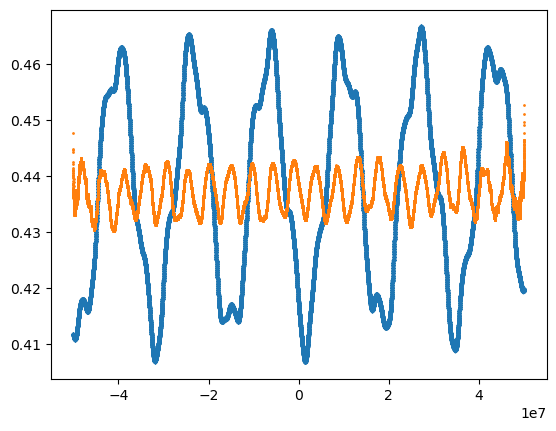

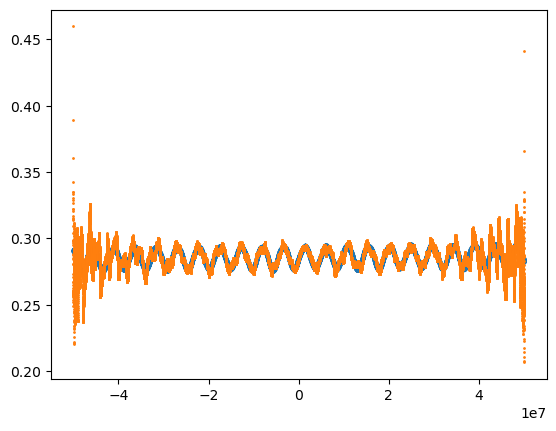

In [3]:
print(pe.a)
print(pe.sini)
print(pe.e)
plt.scatter(pe.time,pe.original_sini[0],s=2)
plt.scatter(pe.time,pe.filtered_sini[0],s=1)
plt.show()
plt.scatter(pe.time,pe.original_ecc[0],s=2)
plt.scatter(pe.time,pe.filtered_ecc[0],s=1)
plt.show()